In [ ]:
print('\nSurface Code - Qubit 4 Focused Implementation')

### Surface Code (Simplified) - Qubit 4 Focused
This notebook demonstrates a simplified version of surface code error correction targeting **qubit 4** only.
It includes:
- Encoding stabilizers around qubit 4
- Injecting a bit-flip error
- Measuring X and Z stabilizers
- Correcting the error
- Final measurement to verify correction


In [50]:
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit_aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
import numpy as np
from qiskit import *
import matplotlib.pyplot as plt


### Step 1: Define Surface Code Circuit for Qubit 4

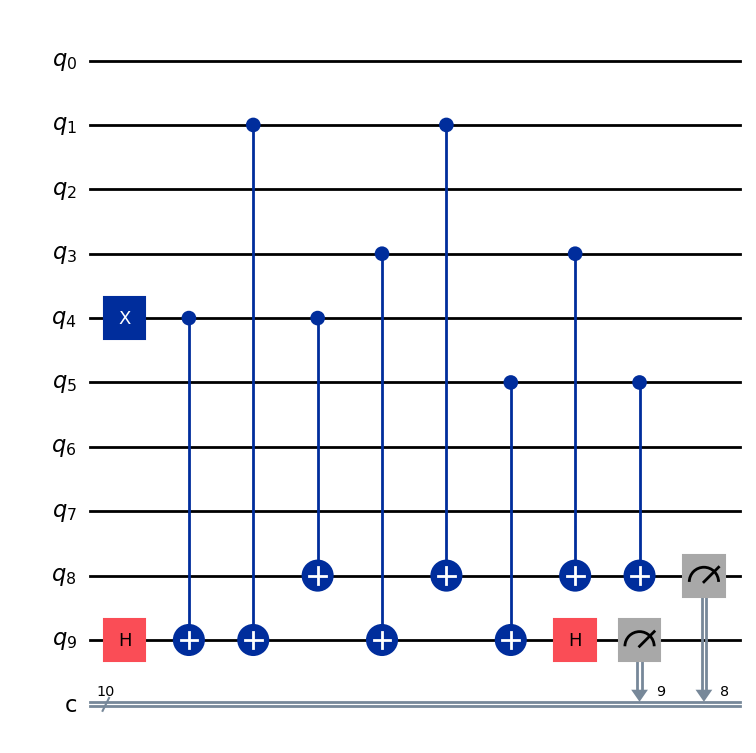

In [51]:
def surface_code_q4_only_with_error():
    qc = QuantumCircuit(10, 10)

    # Inject X error BEFORE stabilizers
    qc.x(4)

    # X-Stabilizer (detects bit-flips)
    qc.h(9)
    qc.cx(4, 9)
    qc.cx(1, 9)
    qc.cx(3, 9)
    qc.cx(5, 9)
    qc.h(9)

    # Z-Stabilizer (detects phase-flips)
    qc.cx(4, 8)
    qc.cx(1, 8)
    qc.cx(3, 8)
    qc.cx(5, 8)

    # Measure ancillas
    qc.measure(9, 9)
    qc.measure(8, 8)
    
    return qc

qc = surface_code_q4_only_with_error()
qc.draw('mpl')

### Step 2: Inject X Error on Qubit 4

In [42]:
qc.x(4)  # Simulate bit-flip error
qc.barrier()
qc.measure(9, 9)  # Measure X-stabilizer (bit-flip check)
qc.measure(8, 8)  # Measure Z-stabilizer (phase-flip check)

### Step 3: Run Syndrome Detection

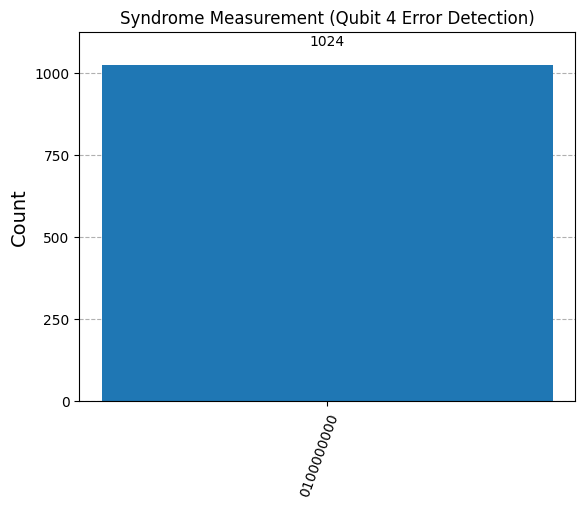

In [52]:
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts, title="Syndrome Measurement (Qubit 4 Error Detection)")

### Step 4: Manual Correction and Final Measurement

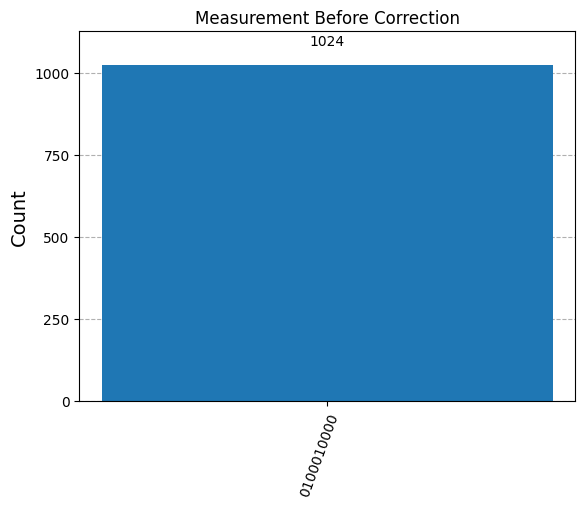

In [55]:
# qc.x(4)  # Apply correction
qc.measure(range(8),range(8))  # Measure all data qubits

job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts, title="Measurement Before Correction")